<a href="https://colab.research.google.com/github/yeb2Binfang/sklearn_learning/blob/main/decision_tree/wine_decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import necessary packages



In [1]:
from sklearn import tree
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

##show the data
so, from the data, we can know that there are three different labels whicha are "class_0","class_1", and "class_2"

In [34]:
wine = load_wine() #load wine
y = wine.target #the labels, there are three labels
X = wine.data #the dataset

##TODO
#print out data shape
print("the data shape is: ")
print(X.shape)
print()
#print out target names
print("the target names: ")
print(wine.target_names)
print()

#print the counts for each labels
unique, counts = np.unique(y, return_counts=True)
print(dict(zip(unique, counts)))
print()
#print out features names
print("the feature names: ")
print(wine.feature_names)
print()
#print out the first 5 lines of labels
print("the data")
print(X[:5])

#print out the first 5 lines of data
print()
print("the labels' coulmn")
print(y[:5])


the data shape is: 
(178, 13)

the target names: 
['class_0' 'class_1' 'class_2']

{0: 59, 1: 71, 2: 48}

the feature names: 
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']

the data
[[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
  2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 1.120e+01 1.000e+02 2.650e+00 2.760e+00
  2.600e-01 1.280e+00 4.380e+00 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 1.860e+01 1.010e+02 2.800e+00 3.240e+00
  3.000e-01 2.810e+00 5.680e+00 1.030e+00 3.170e+00 1.185e+03]
 [1.437e+01 1.950e+00 2.500e+00 1.680e+01 1.130e+02 3.850e+00 3.490e+00
  2.400e-01 2.180e+00 7.800e+00 8.600e-01 3.450e+00 1.480e+03]
 [1.324e+01 2.590e+00 2.870e+00 2.100e+01 1.180e+02 2.800e+00 2.690e+00
  3.900e-01 1.820e+00 4.320e+00 1.040e+00 

##Visualize the data
we can use "panda" to concat the features and targets to a full table,and change the columns names. It is very easy to visualize the data

In [3]:
import pandas as pd
df = pd.concat([pd.DataFrame(X),pd.DataFrame(y)],axis=1)
feature_names = wine.feature_names[:13]
feature_names.append("classes")
df.columns=feature_names
df[0:5]

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,classes
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


##split the data
split data into test and traing data. The test data size is 0.3


In [4]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size = 0.3)
print(Xtrain.shape)
print(Xtest.shape)

(124, 13)
(54, 13)


##train the data
now, we need to build the decision tree model

In [5]:
#use entropy as criterion
clf = tree.DecisionTreeClassifier(criterion='entropy')
#fit the data
clf.fit(Xtrain, ytrain)
#check the accuracy
score = clf.score(Xtest, ytest)
print("The accuracy is: {0:2.5f}".format(score))

The accuracy is: 0.87037


##draw the decision tree

In [6]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

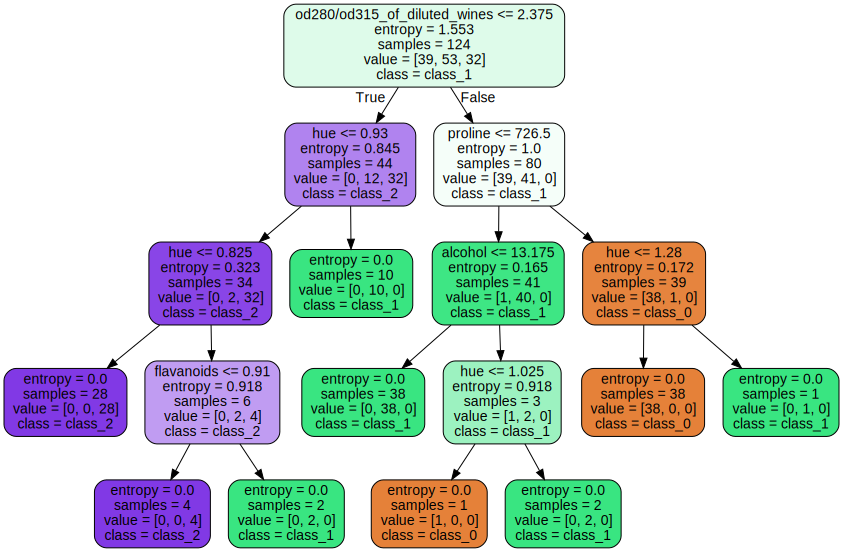

In [7]:
feature_names = wine.feature_names[:13]
class_names = wine.target_names
import graphviz
#"filled = true", it means fill in the color
#"rounded = true", it means rounded retangle
dot_data = tree.export_graphviz( clf
                                ,out_file=None
                                ,feature_names=feature_names
                                ,class_names=class_names
                                ,filled=True
                                ,rounded=True
                               )
graph = graphviz.Source(dot_data)
graph

##explore the decision tree. 
There are 13 features in the table but in the decision tree, it only use some of them.So, we can print the coef of feature importance. If the value is 0, it means it is not important



In [8]:
clf.feature_importances_

array([0.02091077, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.02860588, 0.        , 0.        , 0.        ,
       0.21364427, 0.39172708, 0.34511201])

In [9]:
[*zip(feature_names,clf.feature_importances_)]

[('alcohol', 0.02091077083837437),
 ('malic_acid', 0.0),
 ('ash', 0.0),
 ('alcalinity_of_ash', 0.0),
 ('magnesium', 0.0),
 ('total_phenols', 0.0),
 ('flavanoids', 0.028605880638961183),
 ('nonflavanoid_phenols', 0.0),
 ('proanthocyanins', 0.0),
 ('color_intensity', 0.0),
 ('hue', 0.21364426618693538),
 ('od280/od315_of_diluted_wines', 0.39172707532735396),
 ('proline', 0.3451120070083751)]

we can also use the stem plot to visualize the importance of features

Text(0, 0.5, 'coeff')

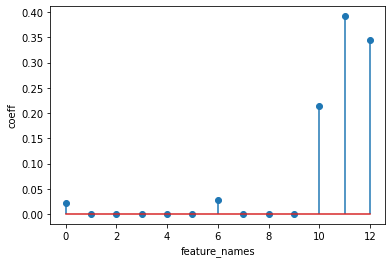

In [10]:
import numpy as np
import matplotlib.pyplot as plt
plt.stem(clf.feature_importances_, use_line_collection=True)
plt.xlabel("feature_names")
plt.ylabel("coeff")

##understand the parameter random_state
random_state will make the model become stable

In [11]:
#use entropy as criterion
clf = tree.DecisionTreeClassifier( criterion='entropy'
                                  ,random_state=5
                                )
#fit the data
clf.fit(Xtrain, ytrain)
#check the accuracy
score = clf.score(Xtest, ytest)
print("The accuracy is: {0:2.5f}".format(score))

The accuracy is: 0.88889


##understand the parameter splitter


In [12]:
#use entropy as criterion
clf = tree.DecisionTreeClassifier( criterion='entropy'
                                  ,random_state=5
                                  #,splitter='random'
                                )
#fit the data
clf.fit(Xtrain, ytrain)
#check the accuracy
score = clf.score(Xtest, ytest)
print("The accuracy is: {0:2.5f}".format(score))

The accuracy is: 0.88889


Without using the parameter splitter


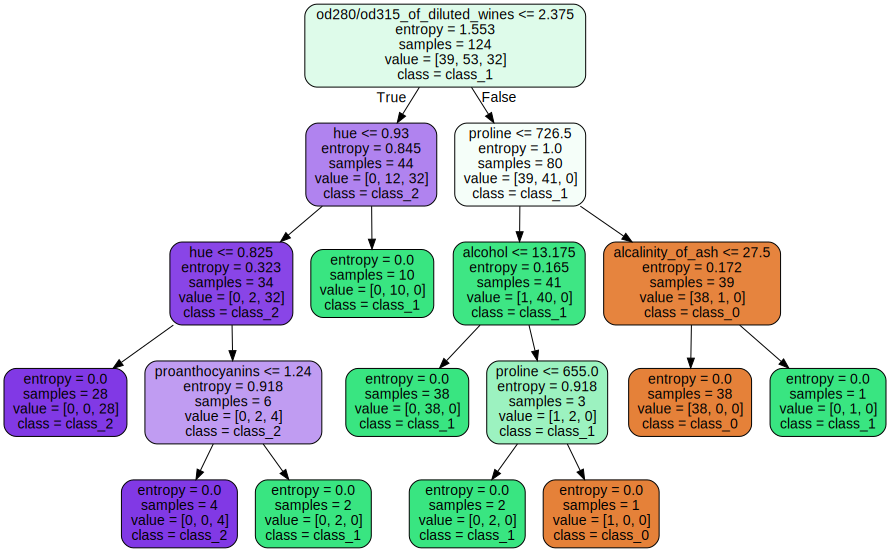

In [13]:
dot_data = tree.export_graphviz( clf
                                ,out_file=None
                                ,feature_names=feature_names
                                ,class_names=class_names
                                ,filled=True
                                ,rounded=True
                               )
graph = graphviz.Source(dot_data)
graph

In [14]:
#use entropy as criterion
clf = tree.DecisionTreeClassifier( criterion='entropy'
                                  ,random_state=5
                                  ,splitter='random'
                                )
#fit the data
clf.fit(Xtrain, ytrain)
#check the accuracy
score = clf.score(Xtest, ytest)
print("The accuracy is: {0:2.5f}".format(score))

The accuracy is: 0.92593


we can notice that after we use splitter, the tree is deeper and wider than before

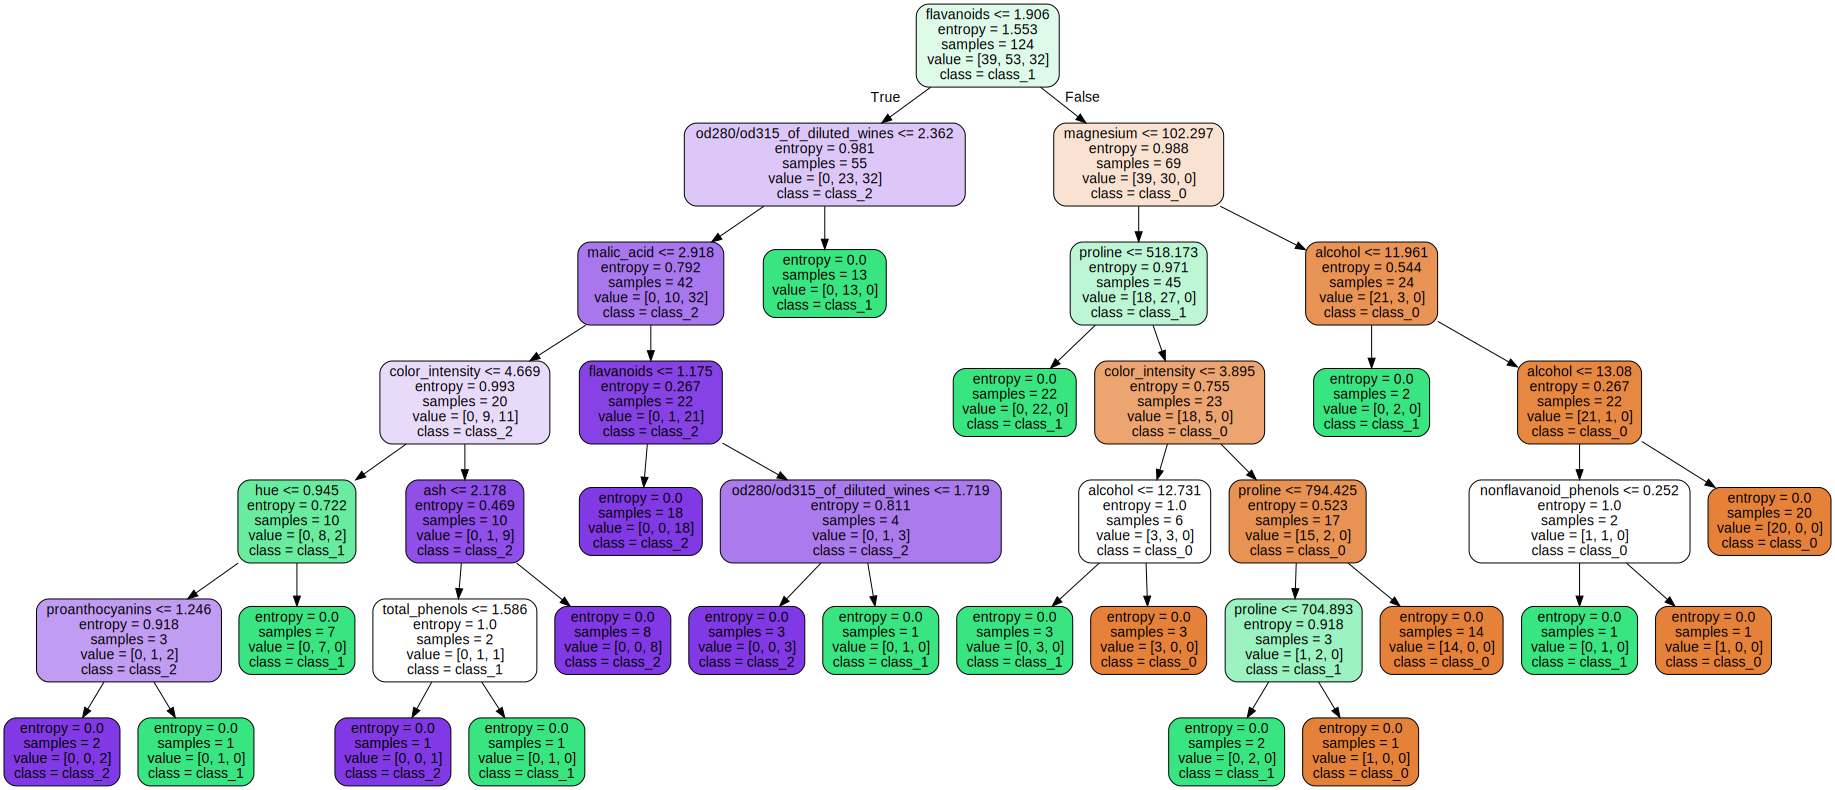

In [15]:
dot_data = tree.export_graphviz( clf
                                ,out_file=None
                                ,feature_names=feature_names
                                ,class_names=class_names
                                ,filled=True
                                ,rounded=True
                               )
graph = graphviz.Source(dot_data)
graph

we can see how the training data fit in the model. If the score of test data and score of training data have a big difference, it means it overfits.

In [16]:
train_score = clf.score(Xtrain, ytrain)
train_score

1.0

##understand the prim parameters
min_samples_leaf,

min_samples_split,

max_depth


In [17]:
#use entropy as criterion
clf = tree.DecisionTreeClassifier( criterion='entropy'
                                  ,random_state=5
                                  ,splitter='random'
                                  ,max_depth = 10
                                  ,min_samples_leaf = 2
                                  ,min_samples_split = 2
                                )
#fit the data
clf.fit(Xtrain, ytrain)
#check the accuracy
score = clf.score(Xtest, ytest)
print("The accuracy is: {0:2.5f}".format(score))

The accuracy is: 0.96296


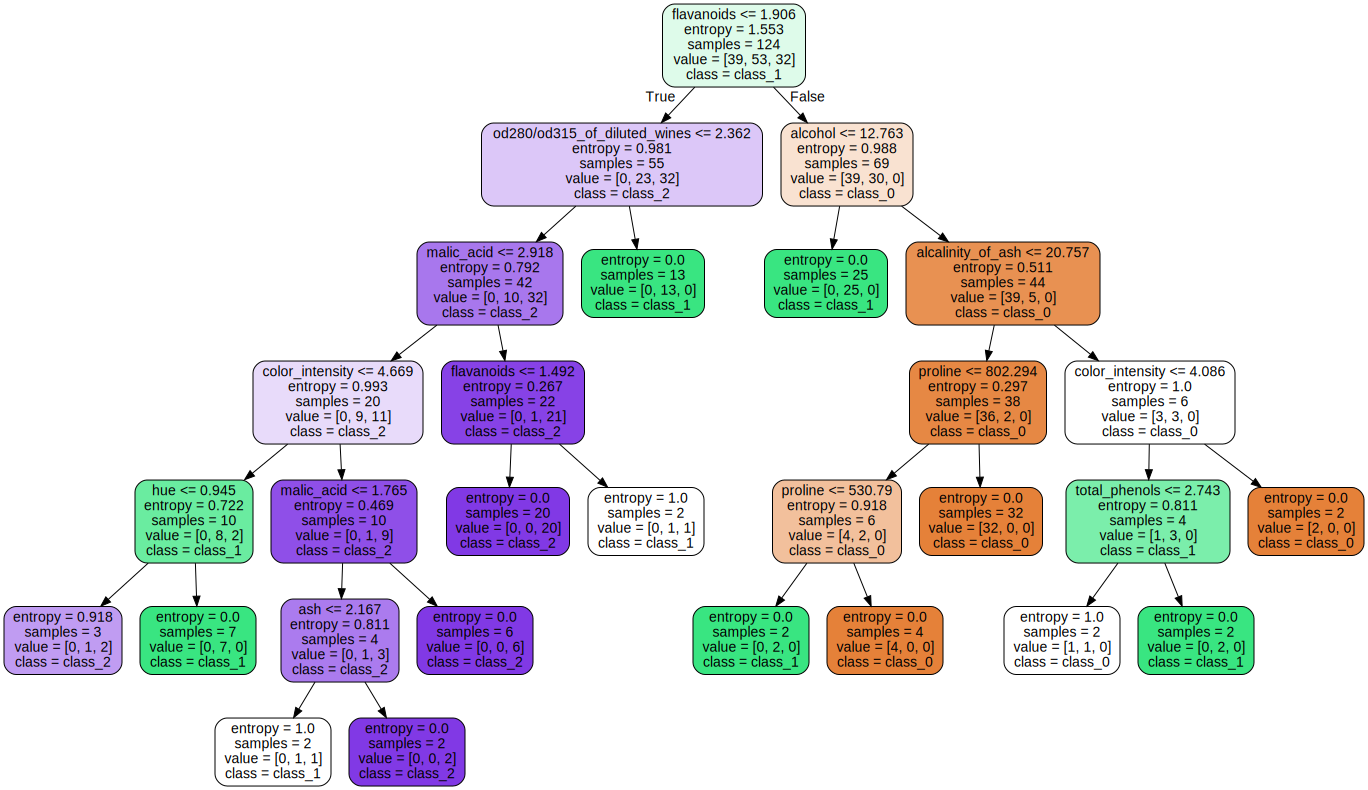

In [18]:
dot_data = tree.export_graphviz( clf
                                ,out_file=None
                                ,feature_names=feature_names
                                ,class_names=class_names
                                ,filled=True
                                ,rounded=True
                               )
graph = graphviz.Source(dot_data)
graph

##How to know which value is better
we can draw a plot to see every value correspond to the score


<function matplotlib.pyplot.show>

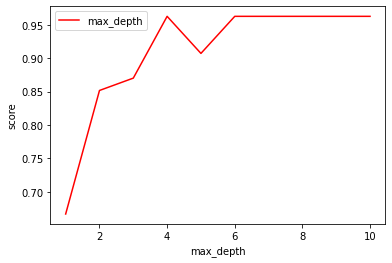

In [27]:
score_acc = []
for i in range(10):
  #use entropy as criterion
  clf = tree.DecisionTreeClassifier( criterion='entropy'
                                    ,random_state=5
                                    ,splitter='random'
                                    ,max_depth = i+1
                                    ,min_samples_leaf = 2
                                    ,min_samples_split = 2
                                  )
  #fit the data
  clf.fit(Xtrain, ytrain)
  #check the accuracy
  score = clf.score(Xtest, ytest)
  #append to score_acc
  score_acc.append(score)

plt.plot(range(1,11),score_acc, color='red', label= "max_depth")
plt.xlabel("max_depth")
plt.ylabel("score")
plt.legend()
plt.show

In [26]:
im = np.argmax(score_acc)
print("the best result is when max-depth = {0:2d}, the acc is : {1:2.4f}".format(range(1,11)[im],score_acc[im]))

the best result is when max-depth =  4, the acc is : 0.9630


##when data is extremely unbalance
we use 59 class_0 and 3 class_1, it is unblance data, however, the decision tree will help us use the class_weight which means even the data is unblance but they have same weight.  

In [55]:
X1 = X[:62]
y1 = y[:62]
X1train, X1test, y1train, y1test = train_test_split(X1,y1,test_size = 0.3)
print(X1train.shape)
print(X1test.shape)

(43, 13)
(19, 13)


In [56]:
#use entropy as criterion
clf = tree.DecisionTreeClassifier( criterion='entropy'
                                  ,random_state=5
                                  ,splitter='random'
                                  ,max_depth = 10
                                  ,min_samples_leaf = 2
                                  ,min_samples_split = 2
                                )
#fit the data
clf.fit(X1train, y1train)
#check the accuracy
score = clf.score(X1test, y1test)
print("The accuracy is: {0:2.5f}".format(score))

The accuracy is: 1.00000


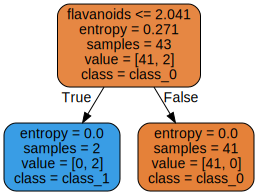

In [58]:
dot_data = tree.export_graphviz( clf
                                ,out_file=None
                                ,feature_names=feature_names
                                ,class_names=class_names
                                ,filled=True
                                ,rounded=True
                              )
graph = graphviz.Source(dot_data)
graph

In [61]:
#it will return the index of nodes
clf.apply(X1test)


array([2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [62]:
#it will return the predict value
clf.predict(X1test)

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [65]:
X2 =np.array([[0],[1]])
print(X2)
print(X2.reshape(-1,1))

[[0]
 [1]]
[[0]
 [1]]


In [66]:
X3 = np.array([0])
print(X3.reshape(1,-1))

[[0]]
